## Titanic :

https://www.kaggle.com/c/titanic/data Use this to acquire domain knowledge

https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv", index_col = 0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
df[df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [5]:
df[(df.Pclass == 1) & (df.Sex == 'female') & (df.Survived == 1) & (df.SibSp == 0)].Embarked.value_counts()

S    24
C    22
Name: Embarked, dtype: int64

In [6]:
df['Cabin'].str[0]

PassengerId
1      NaN
2        C
3      NaN
4        C
5      NaN
      ... 
887    NaN
888      B
889    NaN
890      C
891    NaN
Name: Cabin, Length: 891, dtype: object

In [7]:
df[df.Cabin.notnull()]['Cabin'].str[0]

PassengerId
2      C
4      C
7      E
11     G
12     C
      ..
872    D
873    B
880    C
888    B
890    C
Name: Cabin, Length: 204, dtype: object

In [8]:
df['Deck'] = df['Cabin'].str[0]
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN


In [9]:
df[(df.Pclass == 1) & (df.Sex == 'female') & (df.Survived == 1) & (df.Deck == 'B')].Embarked.mode()

0    S
Name: Embarked, dtype: object

In [10]:
df.Embarked.fillna('S', inplace = True)

In [11]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN


In [12]:

df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Deck        687
dtype: int64

In [13]:
df.loc[[62, 830]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S,B
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S,B


In [14]:
df['Family'] = df['SibSp'] + df['Parch']
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,3


In [15]:
df.corr()           #Coorelation Matrix

C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\1332905129.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()           #Coorelation Matrix


,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
Family,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


In [16]:
df.corr().abs()       #Coorelation Matrix

C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\4117387169.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().abs()       #Coorelation Matrix


,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Survived,1.000000,0.338481,0.077221,0.035322,0.081629,0.257307,0.016639
Pclass,0.338481,1.000000,0.369226,0.083081,0.018443,0.549500,0.065997
Age,0.077221,0.369226,1.000000,0.308247,0.189119,0.096067,0.301914
SibSp,0.035322,0.083081,0.308247,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,0.018443,0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
Family,0.016639,0.065997,0.301914,0.890712,0.783111,0.217138,1.000000


In [17]:
df.corr().unstack()

C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\4102424629.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().unstack()


Survived  Survived    1.000000
          Pclass     -0.338481
          Age        -0.077221
          SibSp      -0.035322
          Parch       0.081629
          Fare        0.257307
          Family      0.016639
Pclass    Survived   -0.338481
          Pclass      1.000000
          Age        -0.369226
          SibSp       0.083081
          Parch       0.018443
          Fare       -0.549500
          Family      0.065997
Age       Survived   -0.077221
          Pclass     -0.369226
          Age         1.000000
          SibSp      -0.308247
          Parch      -0.189119
          Fare        0.096067
          Family     -0.301914
SibSp     Survived   -0.035322
          Pclass      0.083081
          Age        -0.308247
          SibSp       1.000000
          Parch       0.414838
          Fare        0.159651
          Family      0.890712
Parch     Survived    0.081629
          Pclass      0.018443
          Age        -0.189119
          SibSp       0.414838
        

In [18]:
df.groupby(['Pclass', 'Family'])[['Age']].median()

Age
Pclass Family      
1      0       38.5
       1       37.0
       2       39.5
       3       14.0
       4       19.5
       5       23.5
2      0       31.0
       1       29.0
       2       22.0
       3       24.0
       4       54.0
       5       24.0
3      0       26.0
       1       24.5
       2       24.0
       3        5.0
       4       12.5
       5        8.0
       6        9.0
       7       12.5
       10       NaN

In [19]:
df.groupby(['Pclass','Family'])[['Age']].median().unstack()

Age                                             
Family    0     1     2     3     4     5    6     7   10
Pclass                                                   
1       38.5  37.0  39.5  14.0  19.5  23.5  NaN   NaN NaN
2       31.0  29.0  22.0  24.0  54.0  24.0  NaN   NaN NaN
3       26.0  24.5  24.0   5.0  12.5   8.0  9.0  12.5 NaN

In [20]:
df.groupby(['Pclass'])[['Age']].median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [21]:
df.groupby(['Pclass'])[['Age']].mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [22]:
(df.groupby(['Pclass'])[['Age']].mean() + df.groupby(['Pclass'])[['Age']].median())/2

,Age
Pclass,
1,37.616720
2,29.438815
3,24.570310


In [23]:
Analysis
    - Univariate Analysis
    - Bivariate Analysis
    - Multivariate Analysis

IndentationError: unexpected indent (1895993193.py, line 2)

In [24]:
sns.violinplot(df['Age'])

KeyError: 0

In [29]:
sns.violinplot?


In [25]:
df.Age.mean()

29.69911764705882

In [26]:
df.Age.median()

28.0

In [27]:
df.Fare.min()

0.0

In [28]:
df.Fare.mean()

32.204207968574636

In [29]:
df.Fare.median()

14.4542

In [30]:
df.Fare.max()

512.3292

In [31]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,


In [32]:
2/891

0.002244668911335578

In [33]:
df[(df.Pclass == 1) & (df.Fare > 75) & (df.Fare < 85 ) & (df.Sex == 'female')].Embarked.mode()

0    C
Name: Embarked, dtype: object

In [34]:
# df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'].fillna('S', inplace = True)

In [35]:
df1 = df.copy()
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,3


In [36]:
df1.Embarked.replace(('S', 'C', 'Q'), (1, 2, 3), inplace = True)
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,NaN,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,C,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,1,NaN,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,1,B,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,1,NaN,3


In [37]:
df1.Sex.replace(('male', 'female'), (1, 2), inplace = True)
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,NaN,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,2,C,1
3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1,C,1
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1,NaN,0
888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,1,B,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,NaN,1,NaN,3


In [38]:
df1['Family'] = df1['SibSp'] + df1['Parch']
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,NaN,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,2,C,1
3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1,C,1
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1,NaN,0
888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,1,B,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,NaN,1,NaN,3


In [39]:
df1 = df1[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Family', 'Ticket',
       'Fare', 'Cabin', 'Embarked']]
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Family,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,1,A/5 21171,7.2500,NaN,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,1,PC 17599,71.2833,C85,2
3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,0,STON/O2. 3101282,7.9250,NaN,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,1,113803,53.1000,C123,1
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,0,373450,8.0500,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,0,211536,13.0000,NaN,1
888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,0,112053,30.0000,B42,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,3,W./C. 6607,23.4500,NaN,1


In [40]:
dfc = df1.corr()
dfc

C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\1998175597.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfc = df1.corr()


,Survived,Pclass,Sex,Age,SibSp,Parch,Family,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.016639,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,0.065997,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.200988,0.182333,0.116569
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,-0.301914,0.096067,0.010171
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.890712,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.783111,0.216225,-0.078665
Family,0.016639,0.065997,0.200988,-0.301914,0.890712,0.783111,1.000000,0.217138,-0.080281
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,0.217138,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,0.010171,-0.059961,-0.078665,-0.080281,0.062142,1.000000


In [41]:
su = df1.corr().iloc[[0]].drop(columns = 'Survived')
su

C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\1443084022.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  su = df1.corr().iloc[[0]].drop(columns = 'Survived')


,Pclass,Sex,Age,SibSp,Parch,Family,Fare,Embarked
Survived,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.016639,0.257307,0.106811


In [42]:
su = su.abs()
su

,Pclass,Sex,Age,SibSp,Parch,Family,Fare,Embarked
Survived,0.338481,0.543351,0.077221,0.035322,0.081629,0.016639,0.257307,0.106811


<Axes: >

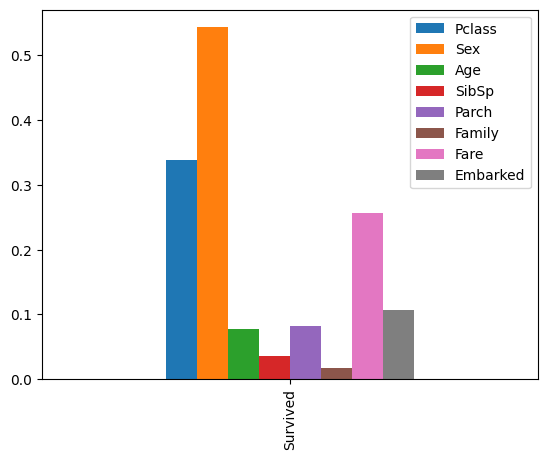

In [43]:
su.plot(kind = 'bar')

In [44]:
df1['Deck'] = df1['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else np.nan)

In [45]:
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Family,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,1,A/5 21171,7.2500,NaN,1,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,1,PC 17599,71.2833,C85,2,C
3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,0,STON/O2. 3101282,7.9250,NaN,1,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,1,113803,53.1000,C123,1,C
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,0,373450,8.0500,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,0,211536,13.0000,NaN,1,NaN
888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,0,112053,30.0000,B42,1,B
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,3,W./C. 6607,23.4500,NaN,1,NaN


In [46]:
df1.Deck.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [47]:
df1[df1.Deck == 'T']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Family,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,,
340,0,1,"Blackwell, Mr. Stephen Weart",1,45.0,0,0,0,113784,35.5,T,1,T


In [48]:
df1.Deck.replace([np.nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], [np.nan, 3, 5, 6, 4, 1, 2, 5, 0], inplace =True)

In [49]:
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Family,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,1,A/5 21171,7.2500,NaN,1,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,1,PC 17599,71.2833,C85,2,3.0
3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,0,STON/O2. 3101282,7.9250,NaN,1,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,1,113803,53.1000,C123,1,3.0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,0,373450,8.0500,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,0,211536,13.0000,NaN,1,NaN
888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,0,112053,30.0000,B42,1,2.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,3,W./C. 6607,23.4500,NaN,1,NaN


In [50]:
df1.corr()

C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Survived,Pclass,Sex,Age,SibSp,Parch,Family,Fare,Embarked,Deck
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.016639,0.257307,0.106811,0.074078
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,0.065997,-0.549500,0.045702,0.522110
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.200988,0.182333,0.116569,0.111241
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,-0.301914,0.096067,0.010171,-0.150319
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.890712,0.159651,-0.059961,0.052095
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.783111,0.216225,-0.078665,0.020578
Family,0.016639,0.065997,0.200988,-0.301914,0.890712,0.783111,1.000000,0.217138,-0.080281,0.044137
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,0.217138,1.000000,0.062142,-0.268925
Embarked,0.106811,0.045702,0.116569,0.010171,-0.059961,-0.078665,-0.080281,0.062142,1.000000,-0.169768
Deck,0.074078,0.522110,0.111241,-0.150319,0.052095,0.020578,0.044137,-0.268925,-0.169768,1.000000


In [51]:
df1['Deckn'] = df1['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else np.nan)
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Family,Ticket,Fare,Cabin,Embarked,Deck,Deckn
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,1,A/5 21171,7.2500,NaN,1,NaN,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,1,PC 17599,71.2833,C85,2,3.0,C
3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,0,STON/O2. 3101282,7.9250,NaN,1,NaN,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,1,113803,53.1000,C123,1,3.0,C
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,0,373450,8.0500,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,0,211536,13.0000,NaN,1,NaN,NaN
888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,0,112053,30.0000,B42,1,2.0,B
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,3,W./C. 6607,23.4500,NaN,1,NaN,NaN


In [52]:
dfd = df1.Deck

In [53]:
dfd.plot?

In [54]:
sns.violinplot?


In [55]:
sns.countplot(df1.Deckn, hue = df1.Pclass)

ValueError: Cannot use `hue` without `x` and `y`

In [56]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [57]:
df1.Deckn.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deckn, dtype: int64

In [58]:
df1[['Deckn', 'Pclass']].value_counts().sort_values()

Deckn  Pclass
T      1          1
E      3          3
D      2          4
E      2          4
G      3          4
F      3          5
       2          8
A      1         15
E      1         25
D      1         29
B      1         47
C      1         59
dtype: int64

In [59]:
df[['Sex', 'Pclass']].value_counts().sort_values()

Sex     Pclass
female  2          76
        1          94
male    2         108
        1         122
female  3         144
male    3         347
dtype: int64

<Axes: >

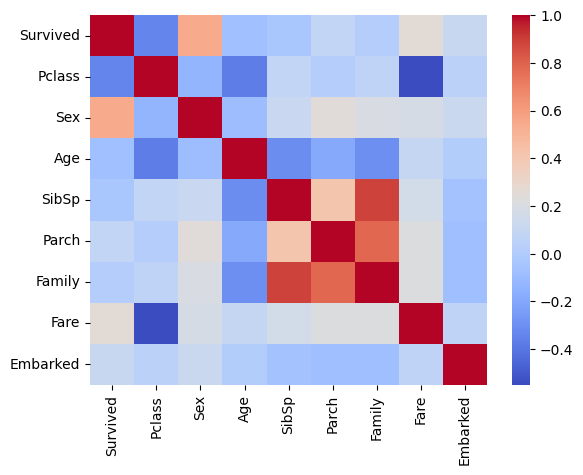

In [60]:
sns.heatmap(dfc, cmap = 'coolwarm')

In [61]:
len(df[df.Sex == 'male'])

577

In [62]:
len(df[df.Sex == 'female'])

314

Conclusion: The dataset is biased against females

In [63]:
len(df)

891

In [64]:
round((len(df[df['Sex']=='male'])/len(df))*100)

65

In [65]:
round((len(df[df['Sex'] == 'female'])/len(df))*100)

35

In [66]:
df[df['Sex'] == 'female']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,NaN,1
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,NaN,0
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,NaN,5


In [67]:
df[(df['Sex'] == 'female')  & (df['Survived'] == 1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,NaN,1
876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,NaN,0
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,C,1


In [68]:
len(df[(df['Sex'] == 'female')  & (df['Survived'] == 1)])/len(df[(df['Sex'] == 'female')])

0.7420382165605095

In [69]:
len(df[(df['Sex'] == 'male')  & (df['Survived'] == 1)])/len(df[(df['Sex'] == 'male')])

0.18890814558058924

Observation: More females survived than males
Inference: The possibility of survival for a female is more than male

In [70]:
df[5:13]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN,1
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,G,2
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,C,0
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,NaN,0


In [71]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,0
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN,2


In [72]:
df.tail(30)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S,NaN,1
863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,D,0
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,10
865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S,NaN,0
866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S,NaN,0
867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,NaN,1
868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,A,0
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,NaN,0
870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,NaN,2


In [73]:
df.sample(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C,NaN,0
656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S,NaN,2
433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S,NaN,1
52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S,NaN,0
436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S,B,3
91,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S,NaN,0
227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S,NaN,0


In [74]:
print(1, ':', len(df[df.Pclass == 1]))
print(2, ':', len(df[df.Pclass == 2]))
print(3, ':', len(df[df.Pclass == 3]))

1 : 216
2 : 184
3 : 491


In [75]:
# Conclusion: The number of passengers from Pclass 3 are more than Pclass 1 and 2 combined. 
#             There were more lower case passengers on the ship.

In [76]:
df.Fare.max()

512.3292

In [77]:
round((len(df[df.Fare == 0])/len(df))*100, 1)

1.7

In [78]:
# Observation: 1.7% of the sample population didn't pay for the ticket
# Inference: Possibilities: Crew Members, Freeloaders passengers, 

In [79]:
df[df.Fare != 0].Fare.min()

4.0125

In [80]:
df.Fare.mean()

32.204207968574636

In [81]:
df.Fare.median()

14.4542

In [82]:
# Observation: Majority of the passengers paid less Fare.
#              The mean value is more than the median
# Inference: Very less number of people paid high fare but the ticket was priced really high for them.
# Domain Inference: There is a lot of gap between upper class and lower class people in the society. 
# Conclusion: There is a lot of variation in the ticket prices for the ship.

In [83]:
n = df[df['Sex'] == 'male']
n

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,0
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,NaN,0
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,NaN,0
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,0


In [84]:
len(df[df['Sex'] == 'male'])/len(df)*100

64.75869809203144

In [85]:
((df.isnull().sum())/len(df))*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.000000
Deck        77.104377
Family       0.000000
dtype: float64

In [86]:
df.corr()

C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
Family,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


In [87]:
# Observation: Age is negatively correlated to Pclass with a value of -0.369.
# Inference: There are more older people in Upper class

In [88]:
print('Upper: ', len(df[(df.Age > 45) & (df.Pclass == 1)]))
print('Middle: ', len(df[(df.Age > 45) & (df.Pclass == 2)]))
print('Lower: ', len(df[(df.Age > 45) & (df.Pclass == 3)]))

Upper:  62
Middle:  23
Lower:  18


In [89]:
# Conclusion: There are more older people in Upper class

In [90]:
df.corr()

C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
Family,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


In [91]:
df.corr().abs()

C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\3426995566.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().abs()


,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Survived,1.000000,0.338481,0.077221,0.035322,0.081629,0.257307,0.016639
Pclass,0.338481,1.000000,0.369226,0.083081,0.018443,0.549500,0.065997
Age,0.077221,0.369226,1.000000,0.308247,0.189119,0.096067,0.301914
SibSp,0.035322,0.083081,0.308247,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,0.018443,0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
Family,0.016639,0.065997,0.301914,0.890712,0.783111,0.217138,1.000000


In [92]:
df.corr().unstack()

C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\4102424629.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().unstack()


Survived  Survived    1.000000
          Pclass     -0.338481
          Age        -0.077221
          SibSp      -0.035322
          Parch       0.081629
          Fare        0.257307
          Family      0.016639
Pclass    Survived   -0.338481
          Pclass      1.000000
          Age        -0.369226
          SibSp       0.083081
          Parch       0.018443
          Fare       -0.549500
          Family      0.065997
Age       Survived   -0.077221
          Pclass     -0.369226
          Age         1.000000
          SibSp      -0.308247
          Parch      -0.189119
          Fare        0.096067
          Family     -0.301914
SibSp     Survived   -0.035322
          Pclass      0.083081
          Age        -0.308247
          SibSp       1.000000
          Parch       0.414838
          Fare        0.159651
          Family      0.890712
Parch     Survived    0.081629
          Pclass      0.018443
          Age        -0.189119
          SibSp       0.414838
        

In [93]:
df.corr().unstack().sort_values(ascending=False).reset_index().loc[6:]

C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\2720402379.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().unstack().sort_values(ascending=False).reset_index().loc[6:]


,level_0,level_1,0
6,Family,Family,1.000000
7,Family,SibSp,0.890712
8,SibSp,Family,0.890712
9,Parch,Family,0.783111
10,Family,Parch,0.783111
11,Parch,SibSp,0.414838
12,SibSp,Parch,0.414838
13,Survived,Fare,0.257307
14,Fare,Survived,0.257307
15,Fare,Family,0.217138


In [94]:
df.corr().abs().unstack().sort_values(ascending=False).reset_index().loc[6:]

C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\3293796064.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().abs().unstack().sort_values(ascending=False).reset_index().loc[6:]


,level_0,level_1,0
6,Family,Family,1.000000
7,Family,SibSp,0.890712
8,SibSp,Family,0.890712
9,Family,Parch,0.783111
10,Parch,Family,0.783111
11,Pclass,Fare,0.549500
12,Fare,Pclass,0.549500
13,Parch,SibSp,0.414838
14,SibSp,Parch,0.414838
15,Pclass,Age,0.369226


In [95]:
df[df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,


In [96]:
df[df['Sex'] == 'male'].count()

Survived    577
Pclass      577
Name        577
Sex         577
Age         453
SibSp       577
Parch       577
Ticket      577
Fare        577
Cabin       107
Embarked    577
Deck        107
Family      577
dtype: int64

In [97]:
df[df['Sex'] == 'male'].count()['Age']

453

In [98]:
df.Name

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [99]:
df[(df['Sex'] == 'male') & (df['Survived'] == 1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,NaN,0
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,D,0
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,A,0
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,NaN,0
56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,NaN,0
840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C,C,0
858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,E,0


In [100]:
len(df[(df['Sex'] == 'male') & (df['Survived'] == 1)])/len(df[df['Sex'] == 'male'])

0.18890814558058924

In [101]:
len(df[(df['Sex'] == 'female') & (df['Survived'] == 1)])/len(df[df['Sex'] == 'female'])

0.7420382165605095

In [102]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [103]:
len(df[df['Sex'] == 'male'])/len(df)

0.6475869809203143

In [104]:
len(df[df['Sex'] == 'female'])/len(df)

0.35241301907968575

In [105]:
len(df[df['Pclass']==3])/len(df)*100

55.106621773288445

In [106]:
len(df[df['Pclass']==2])/len(df)*100

20.65095398428732

In [107]:
len(df[df['Pclass']==1])/len(df)*100

24.242424242424242

In [108]:
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

In [109]:
tuple(df.columns)

('Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Deck',
 'Family')

In [110]:
# access column Age
df["Age"].head(15)

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
11     4.0
12    58.0
13    20.0
14    39.0
15    14.0
Name: Age, dtype: float64

In [111]:
# access column Age, Fare, SibSp
df[["Age", "Fare", 'SibSp']].head()

,Age,Fare,SibSp
PassengerId,,,
1,22.0,7.2500,1
2,38.0,71.2833,1
3,26.0,7.9250,0
4,35.0,53.1000,1
5,35.0,8.0500,0


In [112]:
df.Embarked.unique()      # to see the unique values in a particular column

array(['S', 'C', 'Q'], dtype=object)

In [113]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,3


In [114]:
t = df['Embarked'].isnull()
t

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Name: Embarked, Length: 891, dtype: bool

In [115]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,


In [116]:
df.Embarked

PassengerId
1      S
2      C
3      S
4      S
5      S
      ..
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 891, dtype: object

In [117]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [118]:
df['SibSp'].unique()    #df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [119]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,0


In [120]:
df[3:17]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,0
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN,1
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,G,2
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,C,0


In [121]:
df.loc[4:32, ["Fare"]].head(10)      # df[['Fare']].loc[4:32].head(10)    # df.loc[4:32][['Fare']].head(10)

,Fare
PassengerId,
4,53.1000
5,8.0500
6,8.4583
7,51.8625
8,21.0750
9,11.1333
10,30.0708
11,16.7000
12,26.5500


In [122]:
df.loc[: ,"Fare"].head(2)         # df['Fare'].head(2)

PassengerId
1     7.2500
2    71.2833
Name: Fare, dtype: float64

In [123]:
df.loc[10:20][["Fare", "Name"]]        # df[["Fare", "Name"]].loc[10:20]

,Fare,Name
PassengerId,,
10,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)"
11,16.7000,"Sandstrom, Miss. Marguerite Rut"
12,26.5500,"Bonnell, Miss. Elizabeth"
13,8.0500,"Saundercock, Mr. William Henry"
14,31.2750,"Andersson, Mr. Anders Johan"
15,7.8542,"Vestrom, Miss. Hulda Amanda Adolfina"
16,16.0000,"Hewlett, Mrs. (Mary D Kingcome)"
17,29.1250,"Rice, Master. Eugene"
18,13.0000,"Williams, Mr. Charles Eugene"


In [124]:
df.loc[3 : 5 ,["Fare", "Name"]].head(2)

,Fare,Name
PassengerId,,
3,7.925,"Heikkinen, Miss. Laina"
4,53.100,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"


In [125]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,3


In [126]:
r = df[(df['Embarked'] == 'Q') & (df['Pclass'] == 3)]
r

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,0
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,NaN,5
23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,NaN,0
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,NaN,0
33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q,NaN,0
826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q,NaN,0
829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q,NaN,0


In [127]:
df[(df['Embarked'] == 'Q') & (df['Pclass'] == 2)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.35,E101,Q,E,0
323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.35,NaN,Q,NaN,0
627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.35,NaN,Q,NaN,0


In [128]:
df[(df['Embarked'] == 'Q') & (df['Pclass'] == 1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0,C78,Q,C,2
413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0,C78,Q,C,1


In [129]:
df[(df['Embarked'] == 'C') & (df['Pclass'] == 1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1
31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,NaN,0
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,B,1
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,NaN,1
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C,C,0
843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C,NaN,0
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C,C,1


In [130]:
df[(df['Embarked'] == 'S') & (df['Pclass'] == 1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E,0
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,C,0
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,A,0
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,C,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,D,0
868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,A,0
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,D,2


In [131]:
C1 C2 C2, S1 S2 S3, Q1 Q2 Q3

SyntaxError: invalid syntax (2928924714.py, line 1)

In [132]:
df1 = df[(df['Survived'] == 1) & (df['Parch'] == 1) & (df['Pclass'] == 1)]
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,D,1
167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S,E,1
249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S,D,2
269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S,C,1
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,B,1
320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C,E,2
330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C,B,1
357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E33,S,E,1
524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C,B,1


In [133]:
pd.set_option('display.max_rows', 10)

In [134]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [135]:
len(df.columns)

13

In [136]:
df['Fare'].median()

14.4542

In [137]:
df['Fare'].mean()

32.204207968574636

In [138]:
len(df[df['Fare'] > df['Fare'].median()])/len(df)

0.4983164983164983

In [139]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [140]:
Age:
    A: 0 - 10  Children
    B: 11- 19  Teenagers
    C: 20- 30  Youngsters
    D: 31- 45  Adults
    E: 45- 60  Middle Age
    F: >60     Old

SyntaxError: invalid syntax (2176622755.py, line 1)

In [141]:
# query for people of age 30 - 40
df[(df.Age > 18) & (df.Age < 28)]    # Apply sample() to analyse random data records

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN,2
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,NaN,0
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,C,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,NaN,0
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,NaN,0
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,0


In [142]:
df[~(df.Age > 30)]      # Age <= 30

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,NaN,0
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,0


In [143]:
df[(df.Sex == 'male') & (df.Survived == 1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,NaN,0
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,D,0
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,A,0
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,NaN,0
56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,NaN,0
840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C,C,0
858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,E,0


In [144]:
df[(df.Sex == 'female') & (df.Survived == 1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,NaN,1
876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,NaN,0
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,C,1


In [145]:
df[(df.Sex == 'male')].count()

Survived    577
Pclass      577
Name        577
Sex         577
Age         453
           ... 
Fare        577
Cabin       107
Embarked    577
Deck        107
Family      577
Length: 13, dtype: int64

In [146]:
df[(df.Sex == 'female')].count()

Survived    314
Pclass      314
Name        314
Sex         314
Age         261
           ... 
Fare        314
Cabin        97
Embarked    314
Deck         97
Family      314
Length: 13, dtype: int64

In [147]:
df[df['Sex'] == 'male'].count()

Survived    577
Pclass      577
Name        577
Sex         577
Age         453
           ... 
Fare        577
Cabin       107
Embarked    577
Deck        107
Family      577
Length: 13, dtype: int64

In [148]:
df[(df.Sex == 'male') & (df.Survived == 1)].count()

Survived    109
Pclass      109
Name        109
Sex         109
Age          93
           ... 
Fare        109
Cabin        45
Embarked    109
Deck         45
Family      109
Length: 13, dtype: int64

In [149]:
df[(df.Sex == 'female') & (df.Survived == 1)].count()

Survived    233
Pclass      233
Name        233
Sex         233
Age         197
           ... 
Fare        233
Cabin        91
Embarked    233
Deck         91
Family      233
Length: 13, dtype: int64

In [150]:
len(df[(df.Sex == 'male') & (df.Survived == 1)])/len(df[(df.Sex == 'male')])

0.18890814558058924

In [151]:
len(df[(df.Sex == 'female') & (df.Survived == 1)])/len(df[(df.Sex == 'female')])

0.7420382165605095

In [152]:
# dim of df ??
df.shape

(891, 13)

In [153]:
df.Fare.max()

512.3292

In [154]:
df.Fare.mode()

0    8.05
Name: Fare, dtype: float64

In [155]:
df.Fare.median()

14.4542

In [156]:
df.Fare.mean()

32.204207968574636

In [157]:
df[(df.Fare < df.Fare.mean())]              # df[df.Fare == df.Fare.median()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,0
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,3


In [158]:
df[(df.Fare < df.Fare.mean()) & (df.Survived == 1)]              # df[df.Fare == df.Fare.median()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN,1
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,G,2
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,NaN,1
876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,NaN,0
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,NaN,1


In [159]:
#Observation/Assumption

In [160]:
len(df[(df.Fare < df.Fare.mean()) & (df.Survived == 1)])/len(df[(df.Fare < df.Fare.mean())])

0.3176470588235294

In [161]:
len(df[(df.Fare < df.Fare.mean()) & (df.Survived == 0)])/len(df[(df.Fare < df.Fare.mean())])

0.6823529411764706

In [162]:
len(df[(df.Fare >= df.Fare.mean()) & (df.Survived == 1)])/len(df[(df.Fare >= df.Fare.mean())])

0.5971563981042654

In [163]:
len(df[(df.Fare >= df.Fare.mean()) & (df.Survived == 0)])/len(df[(df.Fare >= df.Fare.mean())])

0.4028436018957346

In [164]:
len(df[(df.Fare < df.Fare.mean())])

680

In [165]:
len(df[(df.Fare >= df.Fare.mean())])

211

In [166]:
#Conclusion/Inference

In [167]:
r[r['Survived'] == 1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
PassengerId,,,,,,,,,,,,,
23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,NaN,0
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,NaN,0
33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,NaN,0
45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q,NaN,0
48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q,NaN,1
654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,NaN,Q,NaN,0
698,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q,NaN,0


In [168]:
df.Fare

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

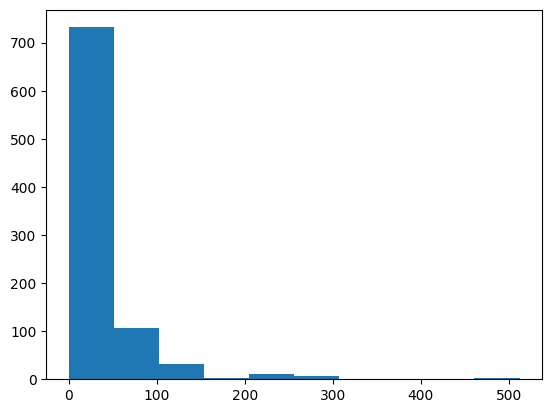

In [169]:
plt.hist(df.Fare)

In [171]:
sns.pairplot?

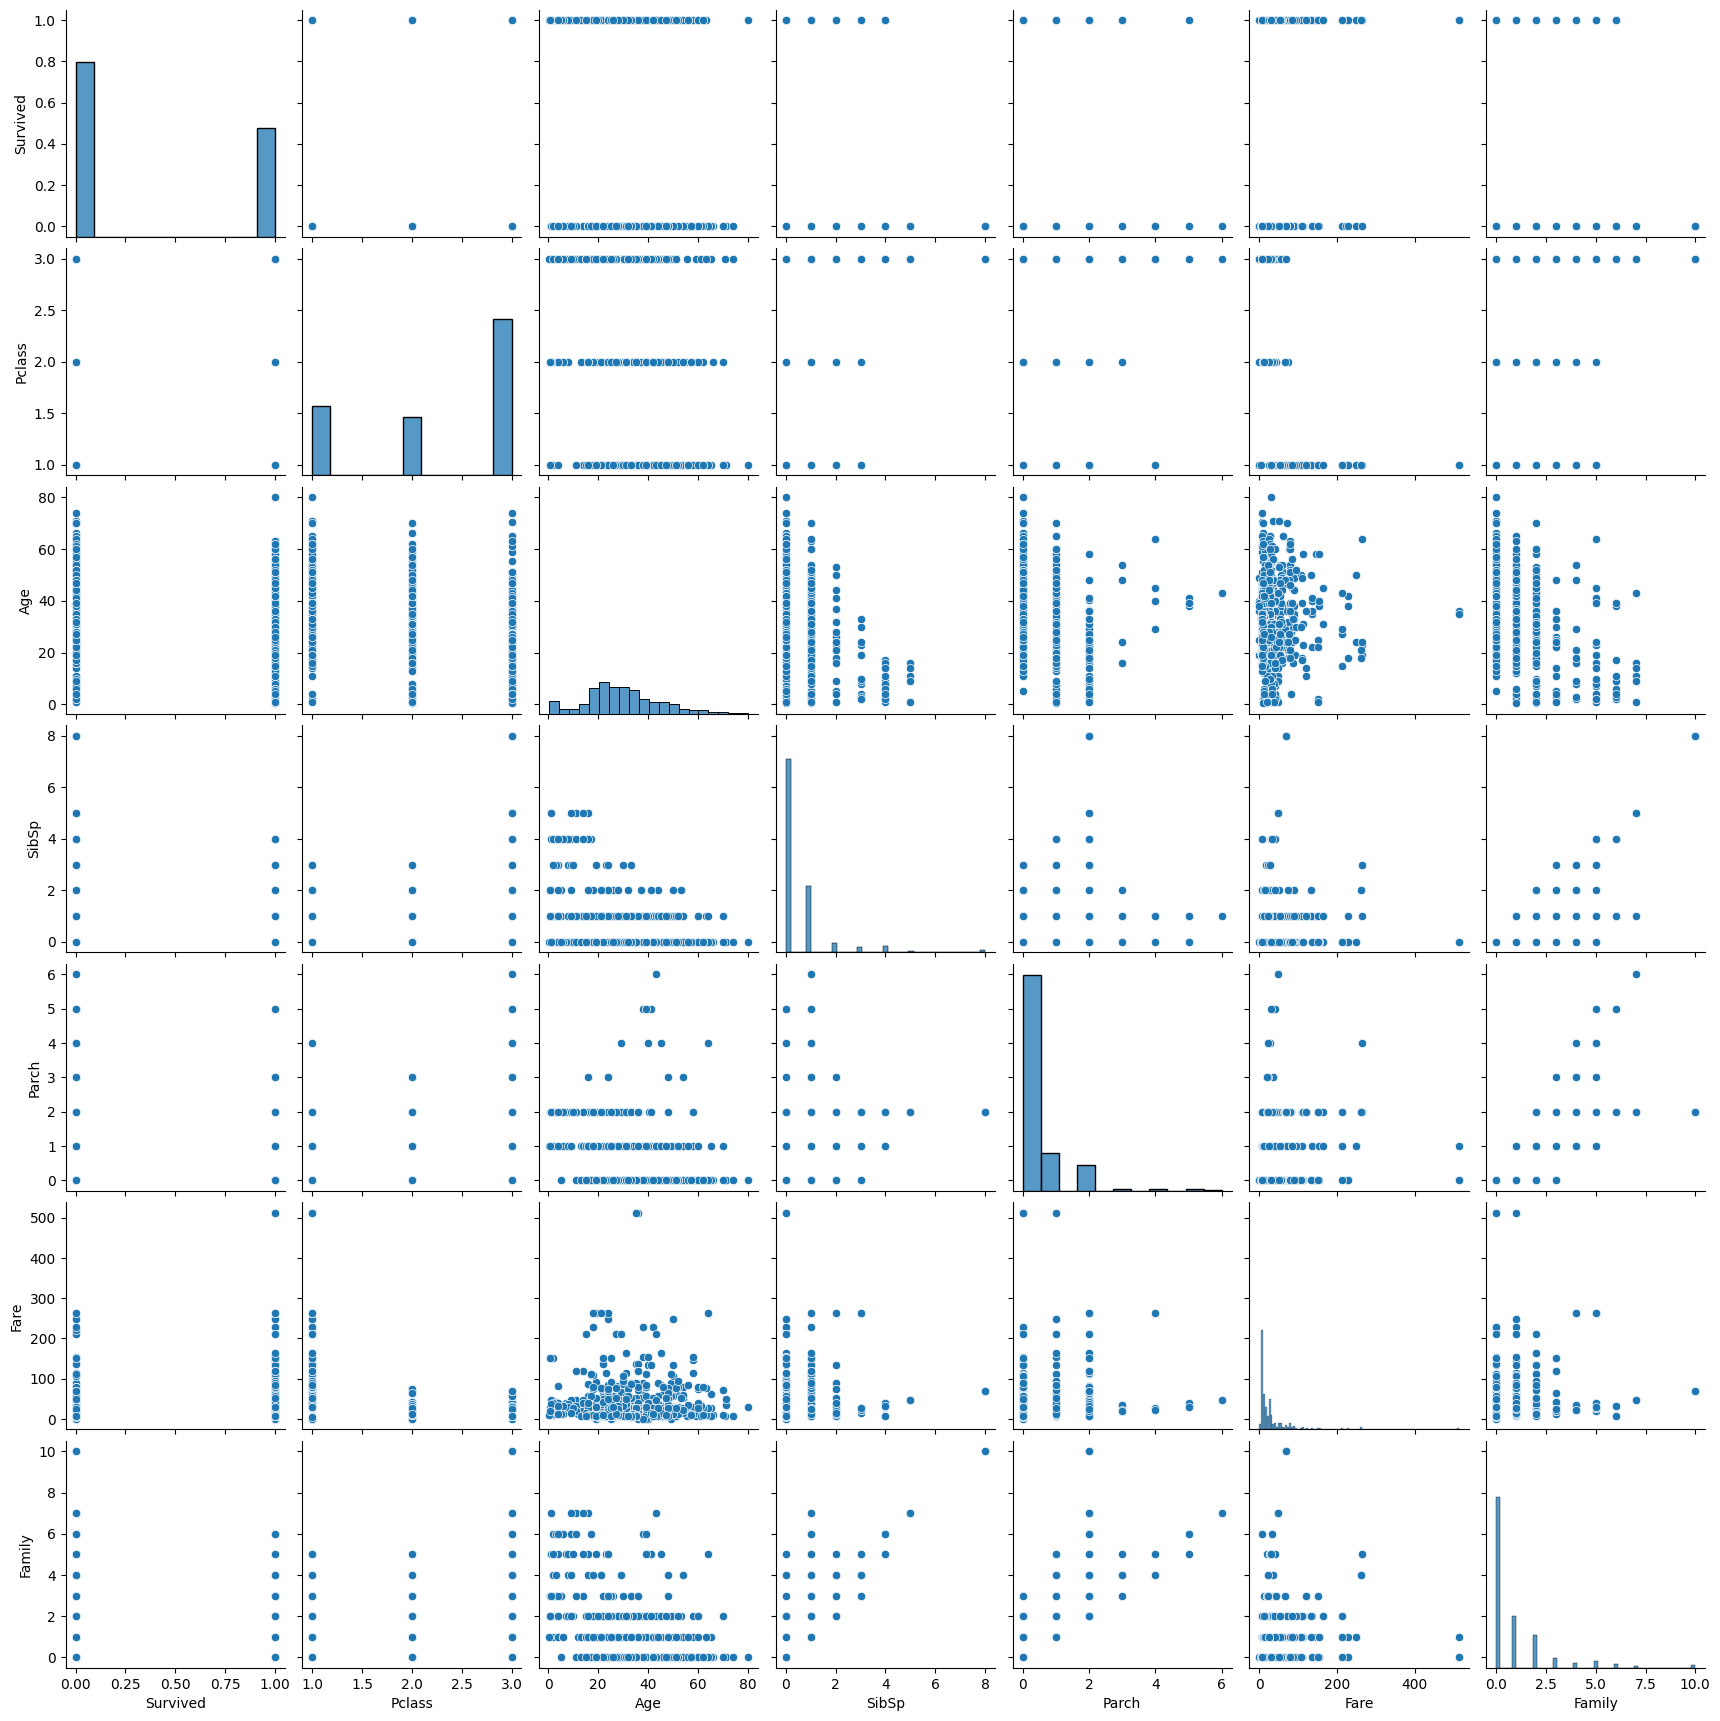

In [172]:
sns.pairplot(df)

In [173]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Deck', 'Family'],
      dtype='object')

In [174]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [175]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [176]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [179]:
for i in df.columns :
    try:
        print(i, " = \n", df[i].max())
    except:
            pass

Survived  = 
 1
Pclass  = 
 3
Name  = 
 van Melkebeke, Mr. Philemon
Sex  = 
 male
Age  = 
 80.0
SibSp  = 
 8
Parch  = 
 6
Ticket  = 
 WE/P 5735
Fare  = 
 512.3292
Embarked  = 
 S
Family  = 
 10


In [180]:
# only datatypes of each col

df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
             ...   
Fare        float64
Cabin        object
Embarked     object
Deck         object
Family        int64
Length: 13, dtype: object

In [181]:
# Datatypes, rows, cols, size

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Deck      204 non-null    object 
 12  Family    891 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 129.7+ KB


In [182]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
           ... 
Fare          0
Cabin       687
Embarked      0
Deck        687
Family        0
Length: 13, dtype: int64

In [183]:
(df.isnull().sum() / len(df)) * 100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
              ...    
Fare         0.000000
Cabin       77.104377
Embarked     0.000000
Deck        77.104377
Family       0.000000
Length: 13, dtype: float64

In [184]:
df.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
           ... 
Fare        891
Cabin       204
Embarked    891
Deck        204
Family      891
Length: 13, dtype: int64

In [185]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
             ...   
Fare        float64
Cabin        object
Embarked     object
Deck         object
Family        int64
Length: 13, dtype: object

In [186]:
df.dtypes == "object"

Survived    False
Pclass      False
Name         True
Sex          True
Age         False
            ...  
Fare        False
Cabin        True
Embarked     True
Deck         True
Family      False
Length: 13, dtype: bool

In [187]:
df.dtypes[df.dtypes == 'object'].index

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Deck'], dtype='object')

In [188]:
df_cat = df[df.dtypes[df.dtypes == 'object'].index]
df_cat.head()

,Name,Sex,Ticket,Cabin,Embarked,Deck
PassengerId,,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,NaN
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,NaN
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,C
5,"Allen, Mr. William Henry",male,373450,NaN,S,NaN


In [189]:
for i in df_cat.columns : 
    print(i, " = \n", df[i].unique())

Name  = 
 ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie

In [190]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [194]:
df.describe(include = np.object)    #List of data types to be included while describing dataframe. Default is None

C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\2981044437.py:1: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.  (This may have returned Python scalars in past versions.
  df.describe(include = np.object)    #List of data types to be included while describing dataframe. Default is None


AttributeError: module 'numpy' has no attribute 'object'

In [193]:
df.describe(include = 'all')    #List of data types to be included while describing dataframe. Default is None

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,891,204,891.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,8,NaN
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,C,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,646,59,NaN
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN,0.904602
...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN,0.000000
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN,1.000000


In [195]:
df.describe(percentiles = [0.1, 0.6, 0.9])

,Survived,Pclass,Age,SibSp,Parch,Fare,Family
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
60%,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200,0.000000
90%,1.000000,3.000000,50.000000,1.000000,2.000000,77.958300,3.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [196]:
# list like data type of numbers between 0-1 to return the respective percentile
df.describe(include = 'all', percentiles = [0.1, 0.9])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,891,204,891.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,8,NaN
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,C,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,646,59,NaN
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN,0.904602
...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
10%,0.000000,1.000000,NaN,NaN,14.000000,0.000000,0.000000,NaN,7.550000,NaN,NaN,NaN,0.000000
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
90%,1.000000,3.000000,NaN,NaN,50.000000,1.000000,2.000000,NaN,77.958300,NaN,NaN,NaN,3.000000


In [197]:
df.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,NaN,1
2,1,1,female,38.0,1,0,71.2833,C,C,1
3,1,3,female,26.0,0,0,7.9250,S,NaN,0
4,1,1,female,35.0,1,0,53.1000,S,C,1
5,0,3,male,35.0,0,0,8.0500,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,NaN,0
888,1,1,female,19.0,0,0,30.0000,S,B,0
889,0,3,female,NaN,1,2,23.4500,S,NaN,3


In [198]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,NaN,1
2,1,1,female,38.0,1,0,71.2833,C,C,1
3,1,3,female,26.0,0,0,7.9250,S,NaN,0
4,1,1,female,35.0,1,0,53.1000,S,C,1
5,0,3,male,35.0,0,0,8.0500,S,NaN,0


In [199]:
df.fillna(value = 100, axis = 1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    object
 1   Pclass    891 non-null    object
 2   Sex       891 non-null    object
 3   Age       891 non-null    object
 4   SibSp     891 non-null    object
 5   Parch     891 non-null    object
 6   Fare      891 non-null    object
 7   Embarked  891 non-null    object
 8   Deck      891 non-null    object
 9   Family    891 non-null    object
dtypes: object(10)
memory usage: 108.9+ KB


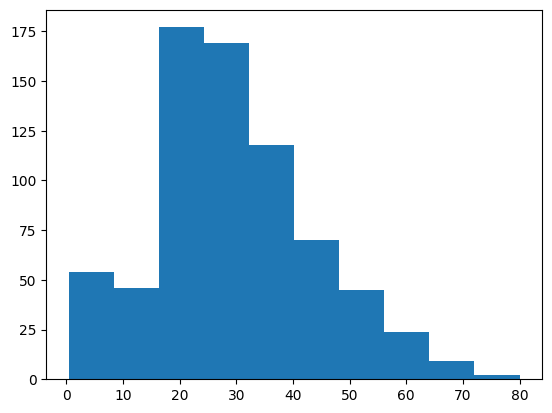

In [201]:
plt.hist(df.Age)     #This parameter is an optional and it contains the integer or sequence or string.
plt.show()

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Deck      204 non-null    object 
 9   Family    891 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 108.9+ KB


In [203]:
df1 = df.copy()

# DataFrame.copy(deep=True)

# When deep=True (default), a new object will be created with a copy of the calling object’s data and indices. 
# Modifications to the data or indices of the copy will not be reflected in the original object (see notes below).

# When deep=False, a new object will be created without copying the calling object’s data or 
# index (only references to the data and index are copied). Any changes to the data of the original will 
# be reflected in the shallow copy (and vice versa).

In [204]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,NaN,1
2,1,1,female,38.0,1,0,71.2833,C,C,1
3,1,3,female,26.0,0,0,7.9250,S,NaN,0
4,1,1,female,35.0,1,0,53.1000,S,C,1
5,0,3,male,35.0,0,0,8.0500,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,NaN,0
888,1,1,female,19.0,0,0,30.0000,S,B,0
889,0,3,female,NaN,1,2,23.4500,S,NaN,3


In [205]:
df1['Age'].median()

28.0

In [210]:
df1.fillna({"Age" : df1['Age'].median(), "Embarked" : "S"}, inplace = True)
# df1['Age'].fillna(df1['Age'].median(), inplace = True)
# df1['Embarked'].fillna('S', inplace= True)

IndentationError: unexpected indent (2731649469.py, line 3)

In [211]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,NaN,1
2,1,1,female,38.0,1,0,71.2833,C,C,1
3,1,3,female,26.0,0,0,7.9250,S,NaN,0
4,1,1,female,35.0,1,0,53.1000,S,C,1
5,0,3,male,35.0,0,0,8.0500,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,NaN,0
888,1,1,female,19.0,0,0,30.0000,S,B,0
889,0,3,female,28.0,1,2,23.4500,S,NaN,3


In [212]:
df['Age'].median()

28.0

In [213]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Deck      204 non-null    object 
 9   Family    891 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 108.9+ KB


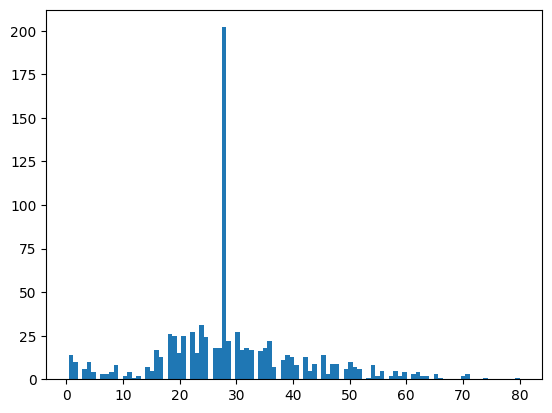

In [214]:
plt.hist(df1.Age, bins = 100)
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

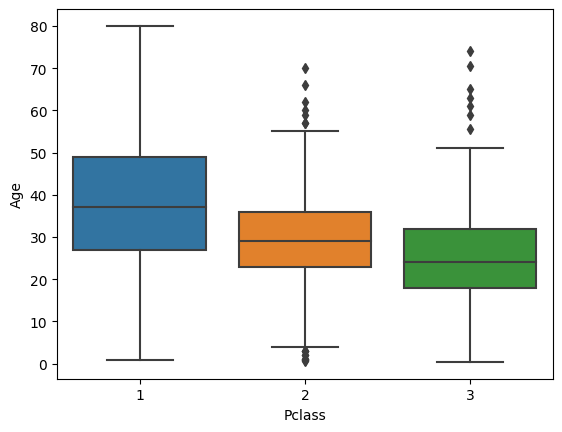

In [215]:
sns.boxplot(x = df.Pclass, y = df.Age)

<Axes: xlabel='Pclass', ylabel='Age'>

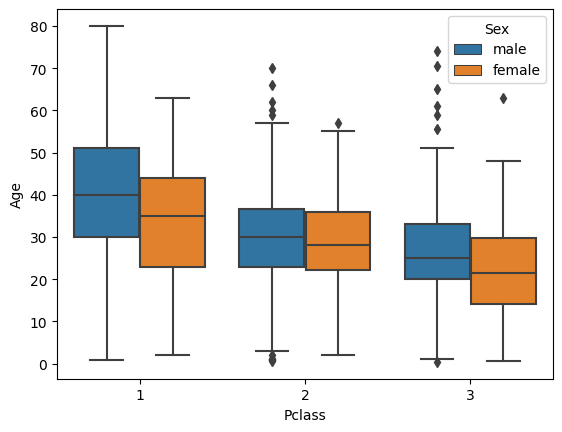

In [216]:
sns.boxplot(x = df.Pclass, y = df.Age, hue = df.Sex)

In [217]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,NaN,1
2,1,1,female,38.0,1,0,71.2833,C,C,1
3,1,3,female,26.0,0,0,7.9250,S,NaN,0
4,1,1,female,35.0,1,0,53.1000,S,C,1
5,0,3,male,35.0,0,0,8.0500,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,NaN,0
888,1,1,female,19.0,0,0,30.0000,S,B,0
889,0,3,female,NaN,1,2,23.4500,S,NaN,3


In [218]:
df2 = df.copy()

In [219]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,NaN,1
2,1,1,female,38.0,1,0,71.2833,C,C,1
3,1,3,female,26.0,0,0,7.9250,S,NaN,0
4,1,1,female,35.0,1,0,53.1000,S,C,1
5,0,3,male,35.0,0,0,8.0500,S,NaN,0
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,NaN,0
888,1,1,female,19.0,0,0,30.0000,S,B,0
889,0,3,female,NaN,1,2,23.4500,S,NaN,3


In [220]:
df2.corr()

C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\1778878097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
Family,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\4068586950.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot = True, cmap ='coolwarm')


<Axes: >

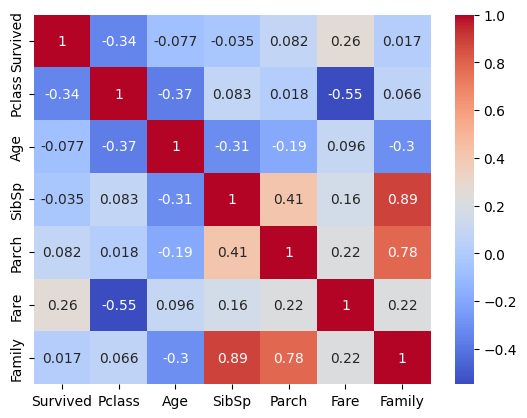

In [221]:
sns.heatmap(df2.corr(), annot = True, cmap ='coolwarm')

<Axes: ylabel='PassengerId'>

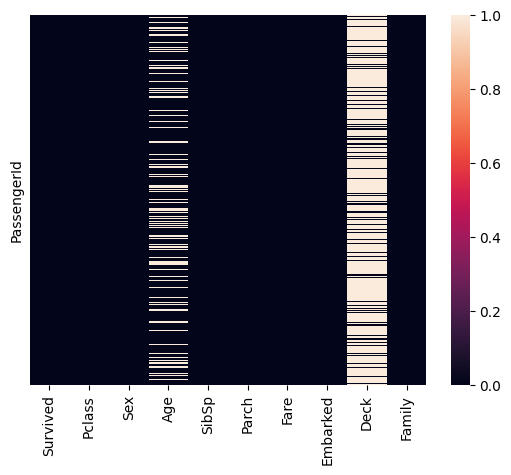

In [222]:
sns.heatmap(df2.isnull(), yticklabels = False)

In [223]:
def fun(c):
    age = c[0]
    pclass = c[1]
    
    if pd.isnull(age) :
        if pclass == 1:
            return 39
        elif pclass == 2:
            return 34
        else:
            return 27
    else:
        return age

In [225]:
df2['Age'] = df2[["Age", 'Pclass']].apply(fun, axis = 1)

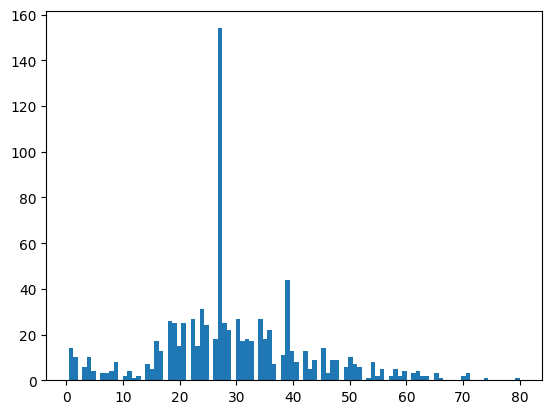

In [226]:
plt.hist(df2.Age, bins = 100)
plt.show()

In [227]:
df2.fillna({"Embarked" : "S"}, inplace = True)

In [228]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Deck      204 non-null    object 
 9   Family    891 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 108.9+ KB


In [229]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,NaN,1
2,1,1,female,38.0,1,0,71.2833,C,C,1
3,1,3,female,26.0,0,0,7.9250,S,NaN,0
4,1,1,female,35.0,1,0,53.1000,S,C,1
5,0,3,male,35.0,0,0,8.0500,S,NaN,0


In [230]:
# univariate analysis : exploring one column at a time

C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\586785296.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.Age, kde = False, bins = 5 )


<Axes: xlabel='Age'>

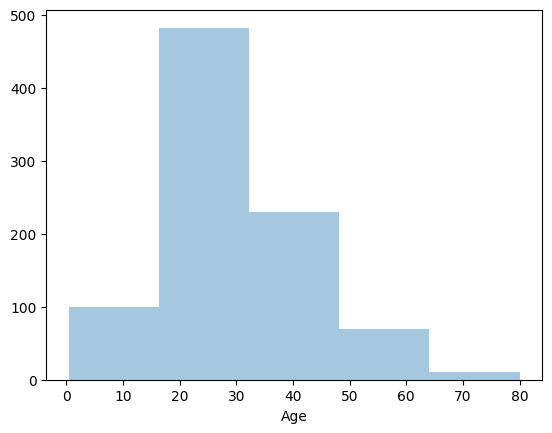

In [231]:
# numerical

# sns.distplot(df.Age, kde = False, bins = 50 )

sns.distplot(df2.Age, kde = False, bins = 5 )

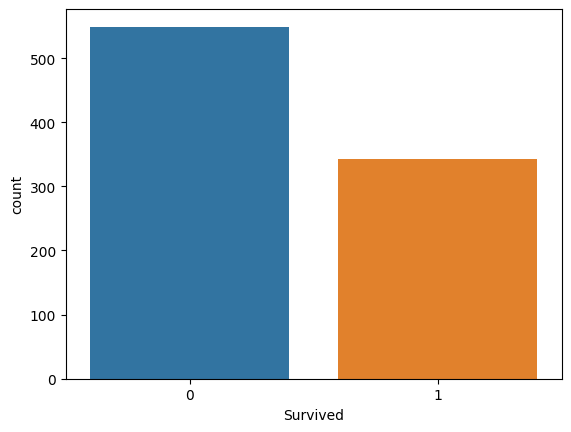

In [232]:
# Categorical:
sns.countplot(x = "Survived", data = df2)
plt.show()

#sns.countplot(x = df2["Survived"])

In [233]:
df1.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

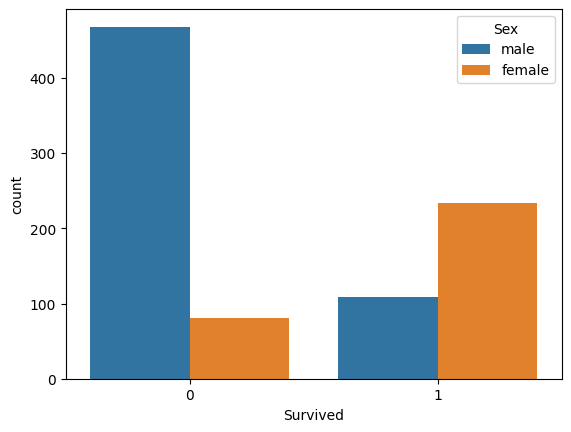

In [234]:
#sns.countplot(x = "Survived", data = df2, hue = "Pclass")
#plt.show()
sns.countplot(x = "Survived", data = df2, hue = "Sex")


In [235]:
# sns.countplot(x = "Survived", data = df2, hue = "Age")


In [236]:
# bivariate analysis - exploring 2 columns at a time
# num vs num, cat vs num, cat vs cat

In [237]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,NaN,1
2,1,1,female,38.0,1,0,71.2833,C,C,1
3,1,3,female,26.0,0,0,7.9250,S,NaN,0
4,1,1,female,35.0,1,0,53.1000,S,C,1
5,0,3,male,35.0,0,0,8.0500,S,NaN,0


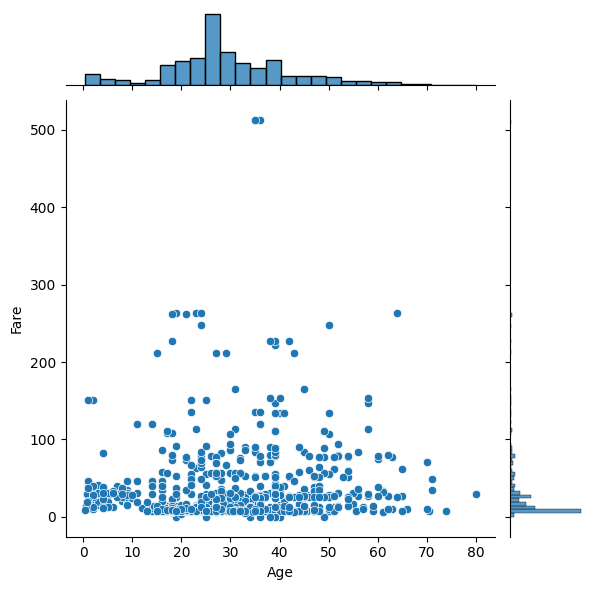

In [238]:
sns.jointplot(x = "Age", y = "Fare", data = df2)
plt.show()

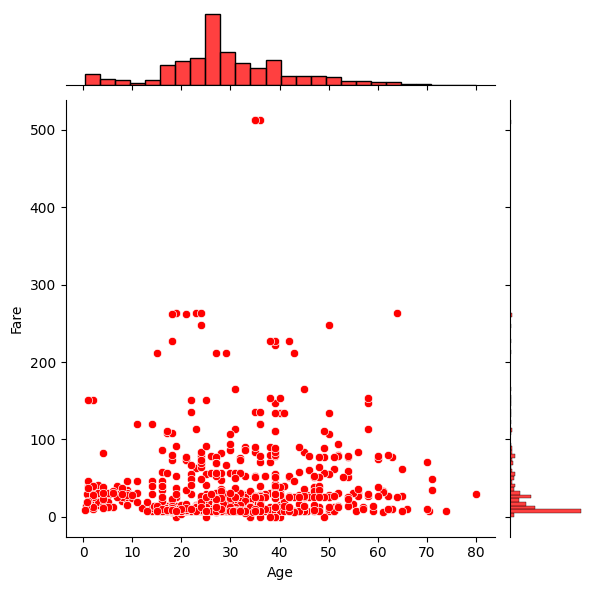

In [239]:
sns.jointplot(x = "Age", y = "Fare", data = df2, color = 'red')
plt.show()

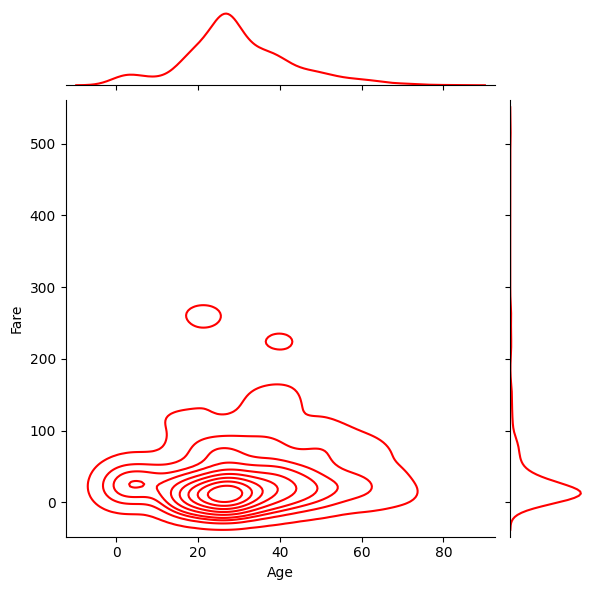

In [240]:
sns.jointplot(x = "Age", y = "Fare", data = df2, color = 'red', kind = "kde")
plt.show()

In [241]:
# cat vs num:

# boxplot, barplot, striplot, swarmplot, violinplot

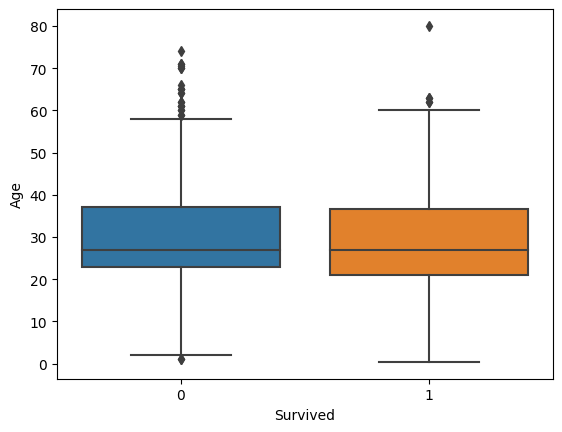

In [242]:
sns.boxplot(x = "Survived", y = "Age", data = df2)
plt.show()

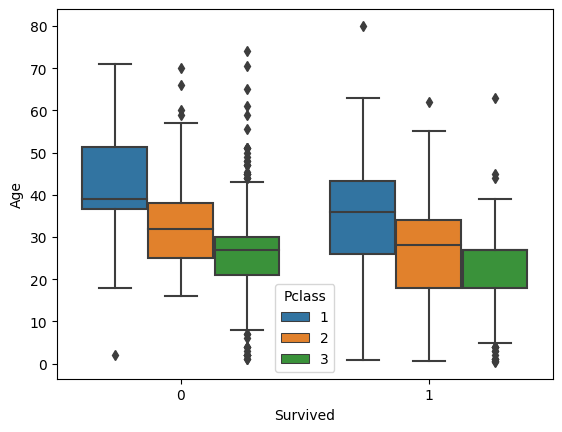

In [243]:
sns.boxplot(x = "Survived", y = "Age", data  = df2, hue = "Pclass")
plt.show()

C:\Python 3.11\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Python 3.11\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Python 3.11\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


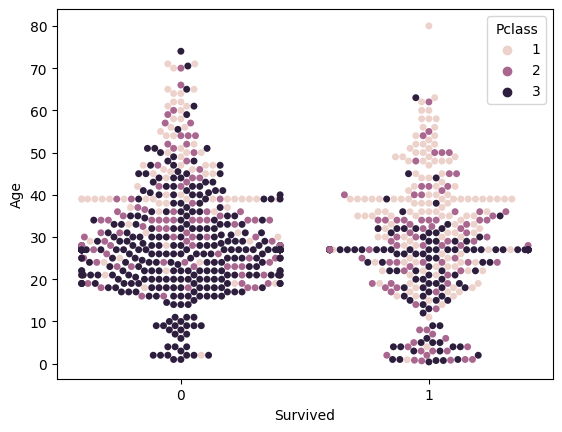

In [244]:
sns.swarmplot(x = "Survived", y = "Age", data  = df2, hue = "Pclass")
plt.show()

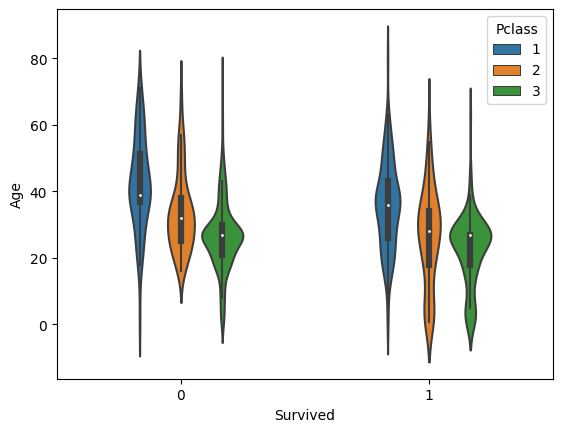

In [245]:
sns.violinplot(x = "Survived", y = "Age", data  = df2, hue = "Pclass", width = 0.5)
plt.show()

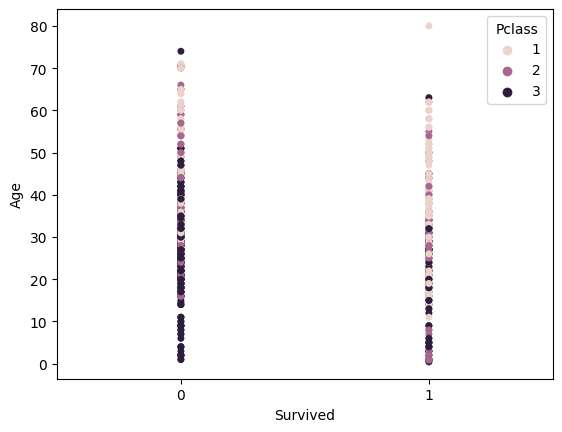

In [246]:
sns.stripplot(x = "Survived", y = "Age", data  = df2, hue = "Pclass", jitter = False)
# sns.color_palette("crest")
plt.show()

<Axes: xlabel='Survived', ylabel='Age'>

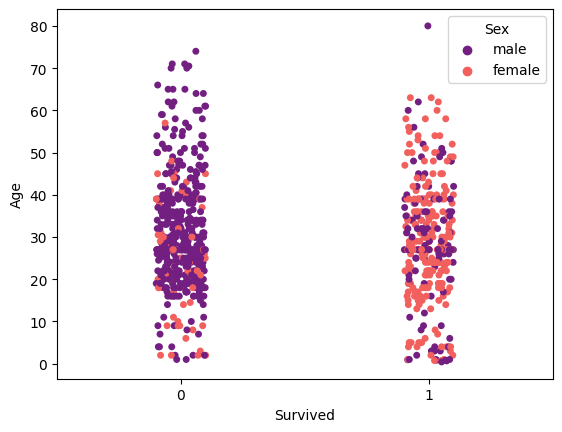

In [247]:
sns.stripplot(x = "Survived", y = "Age", data  = df2, hue = "Sex", palette = 'magma')


In [248]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,NaN,1
2,1,1,female,38.0,1,0,71.2833,C,C,1
3,1,3,female,26.0,0,0,7.9250,S,NaN,0
4,1,1,female,35.0,1,0,53.1000,S,C,1
5,0,3,male,35.0,0,0,8.0500,S,NaN,0


C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\3857359471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby(['Embarked']).sum()
C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\3857359471.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby(['Embarked']).sum().plot(kind = 'pie',y = "Fare")


<Axes: ylabel='Fare'>

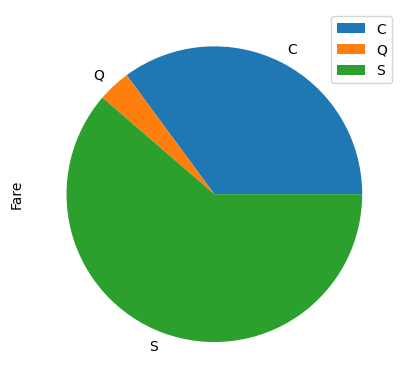

In [249]:
df2.groupby(['Embarked']).sum()

df2.groupby(['Embarked']).sum().plot(kind = 'pie',y = "Fare")

In [250]:

# plt.pie()

df2.groupby(['Embarked']).sum()


C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\4153651141.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby(['Embarked']).sum()


,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Embarked,,,,,,,
C,93,317,5177.92,65,61,10072.2962,126
Q,30,224,2116.50,33,13,1022.2543,46
S,219,1516,19126.75,368,266,17599.3988,634


C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\1929307770.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby(['Pclass']).sum().plot(kind = 'pie',y = "Fare")


<Axes: ylabel='Fare'>

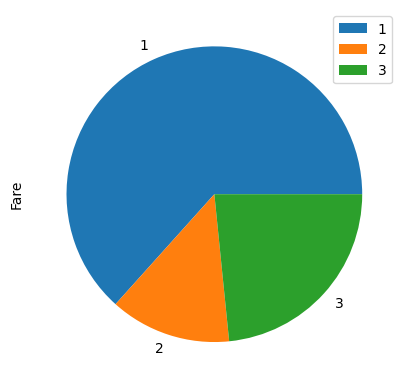

In [251]:
df2.groupby(['Pclass']).sum().plot(kind = 'pie',y = "Fare")

In [252]:
df2.groupby(['Pclass']).sum()

C:\Users\Preeti Pratima\AppData\Local\Temp\ipykernel_26452\2054440952.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby(['Pclass']).sum()


,Survived,Age,SibSp,Parch,Fare,Family
Pclass,,,,,,
1,136,8281.42,90,77,18177.4125,167
2,87,5542.83,74,70,3801.8417,144
3,119,12596.92,302,193,6714.6951,495


In [253]:
# cat to num
# concat...
# joins, merge

In [254]:
df = df2.copy()

In [255]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,NaN,1
2,1,1,female,38.0,1,0,71.2833,C,C,1
3,1,3,female,26.0,0,0,7.9250,S,NaN,0
4,1,1,female,35.0,1,0,53.1000,S,C,1
5,0,3,male,35.0,0,0,8.0500,S,NaN,0


In [256]:
# labelencoder, onehotencoder
# pandas get dummies

In [257]:
s_ = pd.get_dummies(df.Sex, drop_first=True)
s_.head()

,male
PassengerId,
1,1
2,0
3,0
4,0
5,1


In [258]:
e_ = pd.get_dummies(df.Embarked, drop_first=True)
e_.head()

,Q,S
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,1
5,0,1


In [259]:
df = pd.concat([df, s_, e_], axis = 1)

In [260]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family,male,Q,S
PassengerId,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,NaN,1,1,0,1
2,1,1,female,38.0,1,0,71.2833,C,C,1,0,0,0
3,1,3,female,26.0,0,0,7.9250,S,NaN,0,0,0,1
4,1,1,female,35.0,1,0,53.1000,S,C,1,0,0,1
5,0,3,male,35.0,0,0,8.0500,S,NaN,0,1,0,1


In [261]:
df.drop(['Sex', "Embarked"], axis = 1, inplace = True)

In [262]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck,Family,male,Q,S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,NaN,1,1,0,1
2,1,1,38.0,1,0,71.2833,C,1,0,0,0
3,1,3,26.0,0,0,7.9250,NaN,0,0,0,1
4,1,1,35.0,1,0,53.1000,C,1,0,0,1
5,0,3,35.0,0,0,8.0500,NaN,0,1,0,1


In [263]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,NaN,1
2,1,1,female,38.0,1,0,71.2833,C,C,1
3,1,3,female,26.0,0,0,7.9250,S,NaN,0
4,1,1,female,35.0,1,0,53.1000,S,C,1
5,0,3,male,35.0,0,0,8.0500,S,NaN,0


In [264]:
df2['S1'] = df2.Sex.replace(to_replace = ["male", 'female'], value = [0, 1])

In [265]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family,S1
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,NaN,1,0
2,1,1,female,38.0,1,0,71.2833,C,C,1,1
3,1,3,female,26.0,0,0,7.9250,S,NaN,0,1
4,1,1,female,35.0,1,0,53.1000,S,C,1,1
5,0,3,male,35.0,0,0,8.0500,S,NaN,0,0


In [266]:
df['Family'] = df['SibSp'] + df['Parch']

In [267]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck,Family,male,Q,S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,NaN,1,1,0,1
2,1,1,38.0,1,0,71.2833,C,1,0,0,0
3,1,3,26.0,0,0,7.9250,NaN,0,0,0,1
4,1,1,35.0,1,0,53.1000,C,1,0,0,1
5,0,3,35.0,0,0,8.0500,NaN,0,1,0,1


In [268]:
df.drop(['SibSp', "Parch"], axis = 1, inplace = True)

In [269]:
df.head()

,Survived,Pclass,Age,Fare,Deck,Family,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,7.2500,NaN,1,1,0,1
2,1,1,38.0,71.2833,C,1,0,0,0
3,1,3,26.0,7.9250,NaN,0,0,0,1
4,1,1,35.0,53.1000,C,1,0,0,1
5,0,3,35.0,8.0500,NaN,0,1,0,1


In [270]:
df.shape

(891, 9)

In [271]:
df.drop_duplicates(inplace = True)       #Pandas drop_duplicates() methed helps

In [272]:
df.shape

(783, 9)